# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time

Be sure to make note of which computer you are on, so you don't get a file path error.

# Load Data File

In [2]:
# US domestic flights from 1990 to 2009

# on Mini
file_path = '/Users/mini/Documents/swd_challenges/dec_18_submission/chimps_16091-2010-08-03_17-08-31/flight_edges.tsv'

# on MacBook
#file_path = '/Users/benjaminxiao/Documents/swd_challenges/dec_18_submission/chimps_16091-2010-08-03_17-08-31/flight_edges.tsv'

headers = ['Origin', 'Destination', 'Origin City', 'Destination City', 'Passengers', \
          'Seats', 'Flights', 'Distance', 'Fly Date', 'Origin Population' \
          , 'Destination Population']

"""
3 Letter aiport codes for Origin and Destination
Passengers - Number of passengers transported on flight
Seats - Number of seats availalbe
Flights - Number of flights between origin and destination (multiple records for one month, many with flights > 1)
Distance - to the nearest mile
Fly date - YYYYMM
Populations are according to US Cenus data
"""

'\n3 Letter aiport codes for Origin and Destination\nPassengers - Number of passengers transported on flight\nSeats - Number of seats availalbe\nFlights - Number of flights between origin and destination (multiple records for one month, many with flights > 1)\nDistance - to the nearest mile\nFly date - YYYYMM\nPopulations are according to US Cenus data\n'

In [3]:
df = pd.read_csv(file_path, sep='\t', names=headers)

# Data Exploration

In [4]:
df.head(n=10)

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254.0,200810,122049,86219
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034
5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156.0,199003,147300,76034
6,MFR,RDM,"Medford, OR","Bend, OR",2,72,4,156.0,199001,147300,76034
7,MFR,RDM,"Medford, OR","Bend, OR",7,18,1,156.0,199009,147300,76034
8,MFR,RDM,"Medford, OR","Bend, OR",7,36,2,156.0,199011,147300,76034
9,SEA,RDM,"Seattle, WA","Bend, OR",8,18,1,228.0,199002,5154164,76034


In [5]:
print(list(df)) # list columns
#list(df)[0] # week of data collection
#list(df)[1] # search value, country

['Origin', 'Destination', 'Origin City', 'Destination City', 'Passengers', 'Seats', 'Flights', 'Distance', 'Fly Date', 'Origin Population', 'Destination Population']


In [6]:
len(df) # check how many rows

3606803

In [7]:
df.dtypes # Check data types

Origin                     object
Destination                object
Origin City                object
Destination City           object
Passengers                  int64
Seats                       int64
Flights                     int64
Distance                  float64
Fly Date                    int64
Origin Population           int64
Destination Population      int64
dtype: object

In [8]:
df['Fly Date'] = df['Fly Date'].astype(str)

In [9]:
# change fly date to string instead of integer
df = df.astype(dtype = {'Fly Date': 'object'}, copy = False)

In [10]:
df.dtypes # Check to see if data type was changed properly

Origin                     object
Destination                object
Origin City                object
Destination City           object
Passengers                  int64
Seats                       int64
Flights                     int64
Distance                  float64
Fly Date                   object
Origin Population           int64
Destination Population      int64
dtype: object

In [11]:
df['Month'] = None
df['Year'] = None

In [12]:
tester = '200910'
print(tester[:4])
print(tester[4:])

2009
10


In [13]:
df.iat[1,12] = 10 # [row, column] # year
df.iat[1,11] = 9 # month

In [14]:
df.head(n=5)

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population,Month,Year
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254.0,200810,122049,86219,None,None
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034,9,10
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034,None,None
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034,None,None
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034,None,None


In [15]:
testerdf = df.head(n=5)

In [16]:
df.iloc[1].iat[11] = df['Fly Date'][:4] # month
df.iloc[1].iat[12] = df['Fly Date'][4:] # year

In [17]:
df.head(n=3)

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population,Month,Year
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254.0,200810,122049,86219,None,None
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034,9,10
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034,None,None


In [18]:
df.dtypes # check to see if I need to change data types of month and year

Origin                     object
Destination                object
Origin City                object
Destination City           object
Passengers                  int64
Seats                       int64
Flights                     int64
Distance                  float64
Fly Date                   object
Origin Population           int64
Destination Population      int64
Month                      object
Year                       object
dtype: object

In [19]:
#df_fly_dates = df[['Fly Date', 'Flights']]
#df_fly_dates.head(n=5)
df_by_dates = df.groupby('Fly Date').sum().reset_index()

In [20]:
df_by_dates.dtypes

Fly Date                   object
Passengers                  int64
Seats                       int64
Flights                     int64
Distance                  float64
Origin Population           int64
Destination Population      int64
dtype: object

In [21]:
df_by_dates.head(n=5)

,Fly Date,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
0,199001,27605138,55539260,422366,7827975.0,70916223552,71693626139
1,199002,27010787,49894444,379961,7684717.0,69596807481,68886987291
2,199003,32948359,56465593,429472,7635153.0,68680523618,68189402036
3,199004,31177552,55149836,420019,7359825.0,66817182721,65762943942
4,199005,31203382,56815046,435517,7645908.0,70626316107,71946129031


In [22]:
df_by_dates.head(n=5)

,Fly Date,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
0,199001,27605138,55539260,422366,7827975.0,70916223552,71693626139
1,199002,27010787,49894444,379961,7684717.0,69596807481,68886987291
2,199003,32948359,56465593,429472,7635153.0,68680523618,68189402036
3,199004,31177552,55149836,420019,7359825.0,66817182721,65762943942
4,199005,31203382,56815046,435517,7645908.0,70626316107,71946129031


In [23]:
list(df_by_dates)

['Fly Date',
 'Passengers',
 'Seats',
 'Flights',
 'Distance',
 'Origin Population',
 'Destination Population']

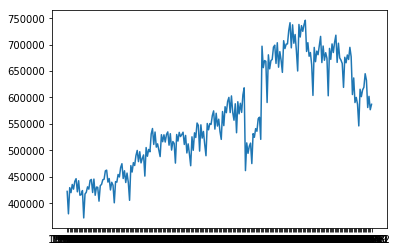

In [24]:
x = df_by_dates['Fly Date']
y = df_by_dates['Flights']

plt.plot(x,y)
plt.rcParams['figure.figsize'] = [30,30]
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=10)
plt.show()

The total flight number trend through the years is pretty clear. Each year, there are a few spikes followed by steady climbs and descends in flight totals.

In [25]:
last_3_yrs = df_by_dates[df_by_dates['Fly Date'] >= '200700']

In [26]:
last_3_yrs.tail(n=5)

,Fly Date,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
235,200908,48286811,60782309,632620,12437195.0,109724855895,112090182021
236,200909,41339351,55401225,581047,11966484.0,104384362898,104180679226
237,200910,45051011,57629612,602156,12293516.0,105848879359,105036943652
238,200911,41686490,55364702,576901,12634172.0,106524893418,106820716257
239,200912,42374318,55890397,587123,13812045.0,116476148126,117541441455


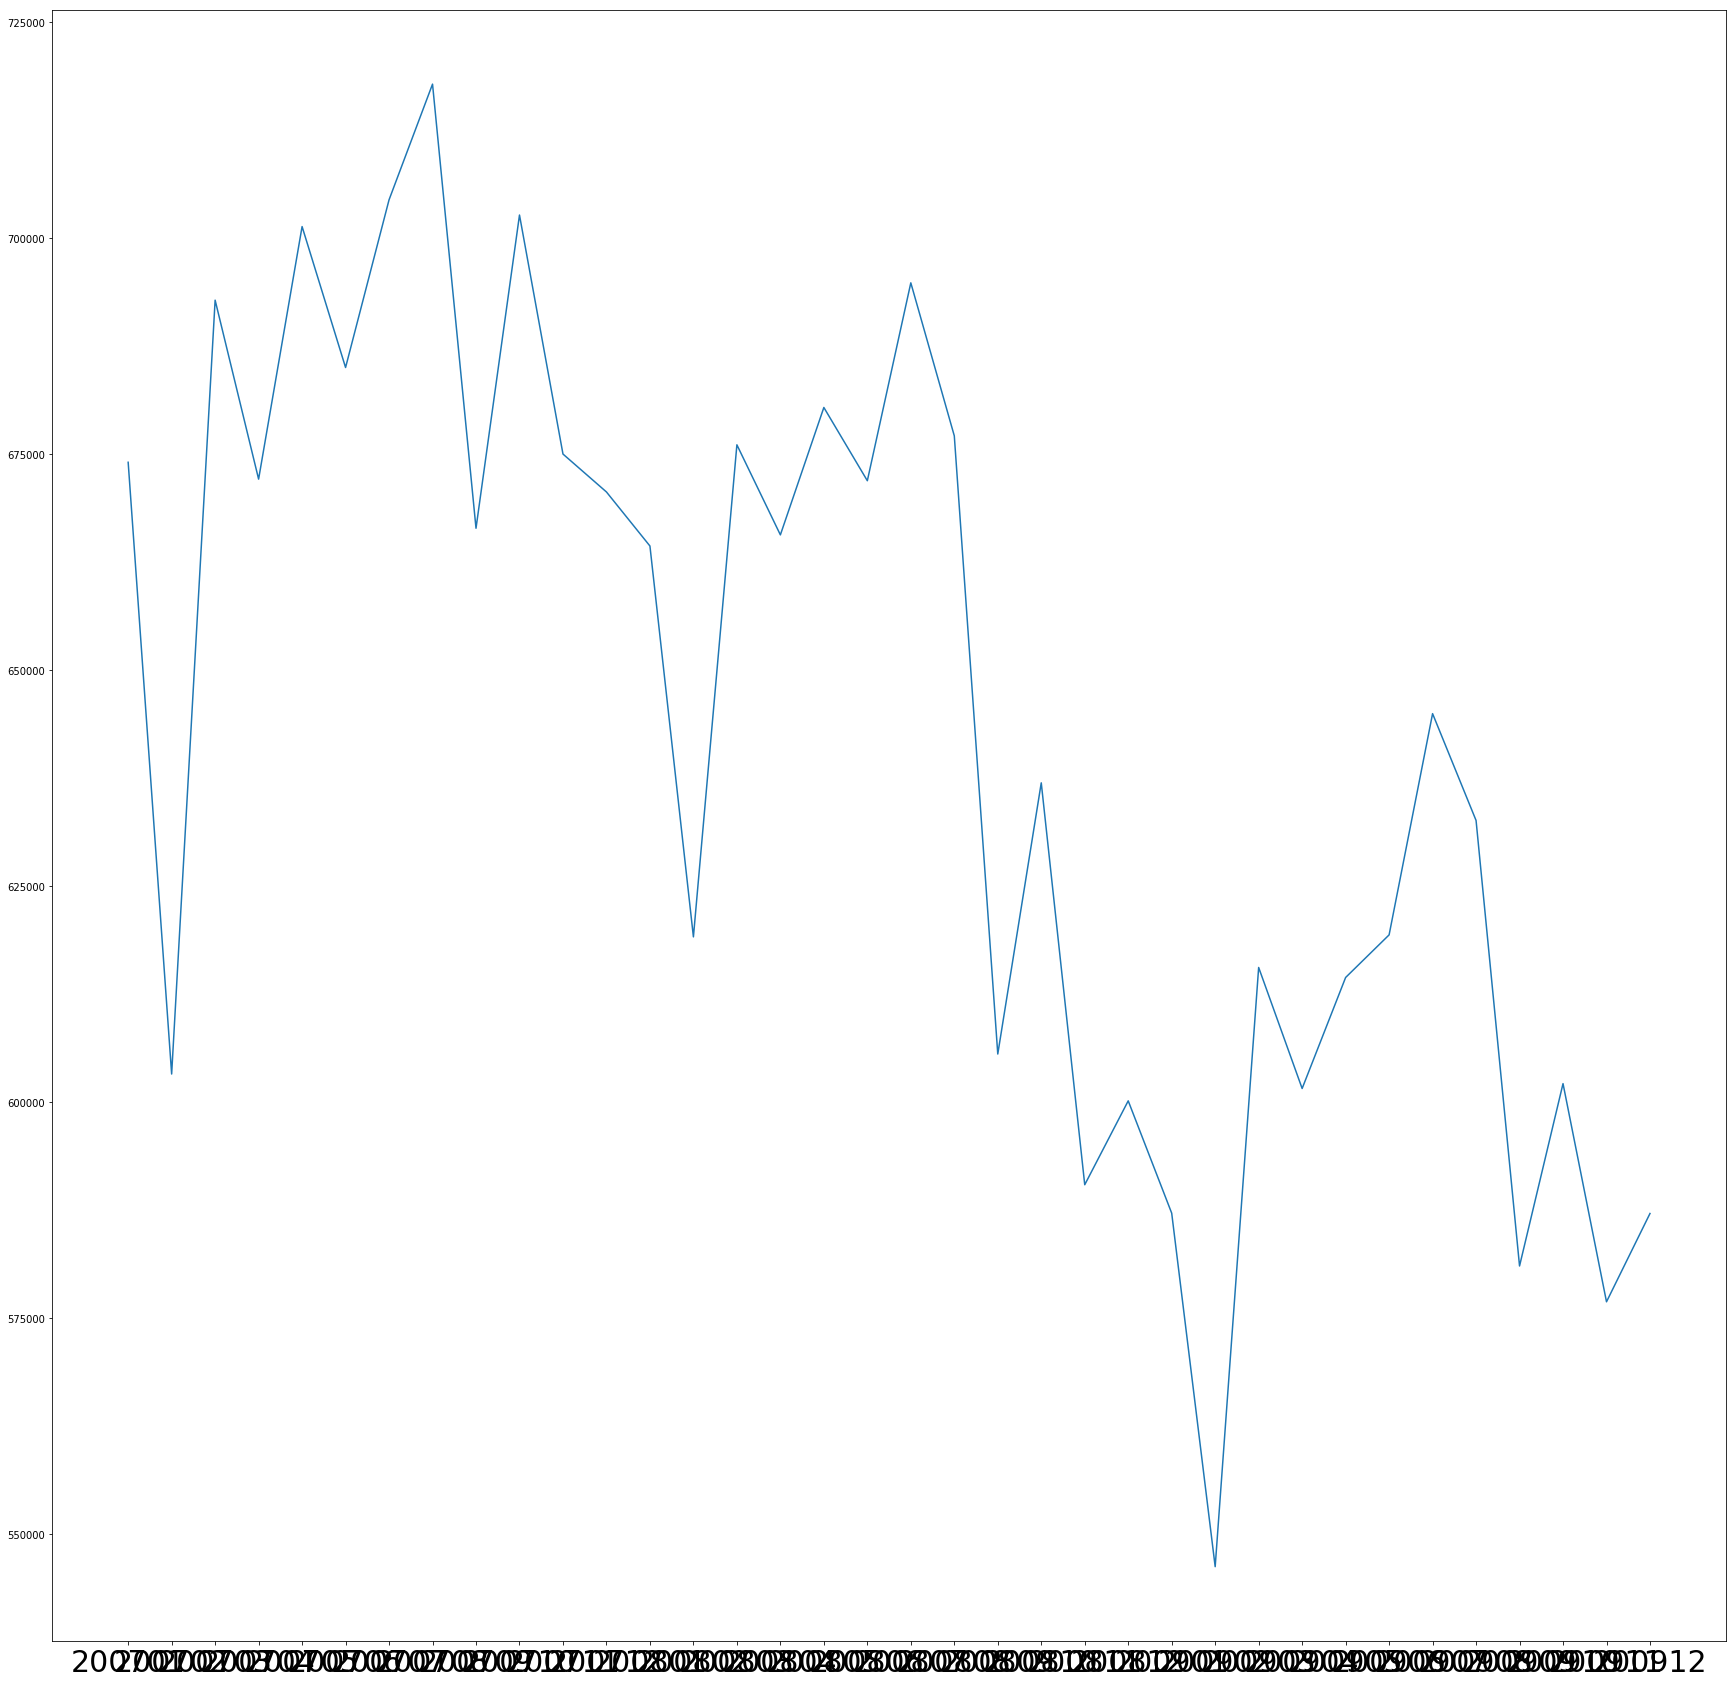

In [27]:
x = last_3_yrs['Fly Date']
y = last_3_yrs['Flights']

plt.plot(x,y)
plt.rcParams['figure.figsize'] = [20,5]
plt.show()

When comparing the last three years, the trend is staying consistent with the spikes during one part of the year. However, the trend in the year 2007 to 2009 is a steady drop in total flights.

In [28]:
last_yr_df = df_by_dates[df_by_dates['Fly Date'] >= '200900']

In [29]:
last_yr_df

,Fly Date,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
228,200901,37693483,56264272,587161,12720735.0,110779946786,110180401865
229,200902,36658009,52111344,546241,11931786.0,105416292463,105457824141
230,200903,45033607,59177379,615601,12605437.0,108914225519,109988156573
231,200904,44485987,57667763,601592,12178741.0,109269414111,110443250407
232,200905,45229482,59012612,614442,12300527.0,108821288826,109862822220
233,200906,47754907,59324513,619372,12819063.0,112620992127,115021278105
234,200907,50708453,61780632,644983,12188270.0,107899280814,110841391566
235,200908,48286811,60782309,632620,12437195.0,109724855895,112090182021
236,200909,41339351,55401225,581047,11966484.0,104384362898,104180679226
237,200910,45051011,57629612,602156,12293516.0,105848879359,105036943652


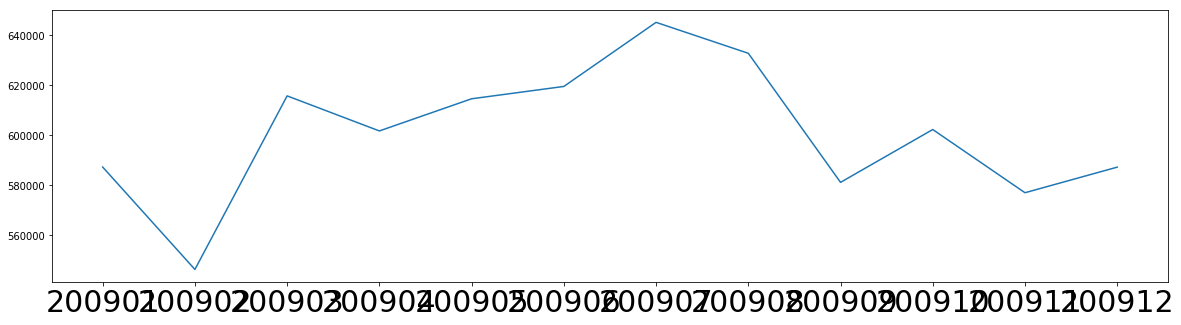

In [30]:
x = last_yr_df['Fly Date']
y = last_yr_df['Flights']

plt.plot(x,y)
plt.rcParams['figure.figsize'] = [15,5]
plt.show()

When looking at just 2009, we can see that the spike in flight totals starts in the summer. This is consistent with a large number of the population relying on summer holidays for the school year. There is another spike in March, consistent with another major school holiday, Spring Break. 

Idea for analysis: 
* which cities are getting more and more departures over the time of data collection around holiday season, November and December

In [31]:
origin_df = df.groupby(['Fly Date', 'Origin City']).sum().reset_index()

In [32]:
origin_df = origin_df.sort_values(by='Flights', ascending = False)

In [33]:
origin_df[origin_df['Fly Date'] == '199010'].nlargest(10, 'Flights')

,Fly Date,Origin City,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
1876,199010,"Chicago, IL",2296968,4045039,29308,499972.0,11230607880,3545673558
1886,199010,"Dallas, TX",2027598,3524850,23582,362397.0,3696874250,1947998907
1849,199010,"Atlanta, GA",1706507,3172105,22295,292588.0,1491385665,2411563554
1949,199010,"Los Angeles, CA",1369604,2438960,15532,465762.0,7656576708,2220390540
2035,199010,"Washington, DC",973665,1841664,15182,200761.0,2903100642,2410917749
1972,199010,"New York, NY",1251398,2228331,13903,391708.0,13697614196,2651599722
1921,199010,"Houston, TX",904587,1675575,12942,250576.0,1261900170,1721318695
2007,199010,"San Francisco, CA",971717,1652926,12229,328369.0,2052370776,2049774323
1889,199010,"Detroit, MI",827106,1430812,10876,174769.0,2797700850,2007296748
2022,199010,"St. Louis, MO",800108,1373099,10578,181766.0,754719552,1502444251


In [34]:
destination_df = df.groupby(['Fly Date', 'Destination City']).sum().reset_index()
# Fly date not summed yet

In [35]:
destination_df.dtypes

Fly Date                   object
Destination City           object
Passengers                  int64
Seats                       int64
Flights                     int64
Distance                  float64
Origin Population           int64
Destination Population      int64
dtype: object

In [36]:
holiday_df = destination_df[(destination_df['Fly Date'] == '199011') |\
              (destination_df['Fly Date'] == '199012')].groupby(['Destination City'])\
.sum().reset_index()

In [37]:
holiday_df.head(n=5)

,Destination City,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
0,"Abilene, TX",510,693,5,3958.0,19871659,738500
1,"Akron, OH",47995,115862,1383,6296.0,107211836,16463950
2,"Albany, NY",139093,300325,2418,41951.0,606435911,79500736
3,"Albuquerque, NM",381069,617075,4606,83297.0,656877428,86672592
4,"Allentown, PA",55814,115367,1192,16232.0,284859270,36481702


In [38]:
holiday_df['Year'] = 1990 # Add the year to the DataFrame

How do I plot each top 10?

put new info into dictionaries 
Include the following
* year
* holiday season is month 11 and 12
* total flights
* destination city
* top origin cities too?
* plot in animated bars?

In [39]:
def holiday_flights(source_df, city, year):
    """
    This function takes three arguments, a source DataFrame, 'Origin City' or 'Destination City',
    and the year in format XXXX integer form. 
    
    It outputs a DataFrame with the 10 cities selected, ordered by total number of flights in
    months November and December.
    """
    year1 = str(year) + '11'
    year2 = str(year) + '12'
    if city == 'Origin City':
        working_df = source_df.groupby(['Fly Date', 'Origin City']).sum().reset_index()
        output_df = working_df[(working_df['Fly Date'] == year1) |\
                              (working_df['Fly Date'] == year2)].groupby(['Origin City'])\
        .sum().nlargest(10, 'Flights').reset_index()
        output_df['Year'] = year
        return output_df
    elif city == 'Destination City':
        working_df = source_df.groupby(['Fly Date', 'Destination City']).sum().reset_index()
        output_df = working_df[(working_df['Fly Date'] == year1) |\
                              (working_df['Fly Date'] == year2)].groupby(['Destination City'])\
        .sum().nlargest(10, 'Flights').reset_index()
        output_df['Year'] = year
        return output_df
    else:
        print('Wrong city input')

In [80]:
# Write function to assign rank to a small DataFrame

def assign_ranks(df):
    # Add a column to the DataFrame that shows the rank in flight numbers
    ranks = [i+1 for i in range(10)]
    df = df.assign(Rank = ranks)
    return df

In [103]:
# Write function to gather years of data
def gather_data(start_year, end_year, ori_or_dest):
    output_df = pd.DataFrame()
    for year in range(start_year, end_year+1):
        work_df = holiday_flights(df, ori_or_dest, year)
        work_df = assign_ranks(work_df)
        output_df = output_df.append(work_df)
    return output_df

In [107]:
result_df = gather_data(2000, 2009, 'Origin City')

Now, plot and encode the following:
* x-axis: year
* y-axis: rank per city
* Include all 10 ranks each year